In [65]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [66]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow
import librosa.display

In [67]:

    ### Let's read a sample audio using librosa
import librosa
audio_file_path="E:\\Music genre project\\sample.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [68]:
print(librosa_audio_data)

[ 1.3373792e-06 -2.0377338e-06  3.6209822e-06 ...  3.8124108e-06
 -2.9998546e-07  1.7823284e-06]


In [69]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 256)


In [70]:
a=[]
a.append(mfccs)

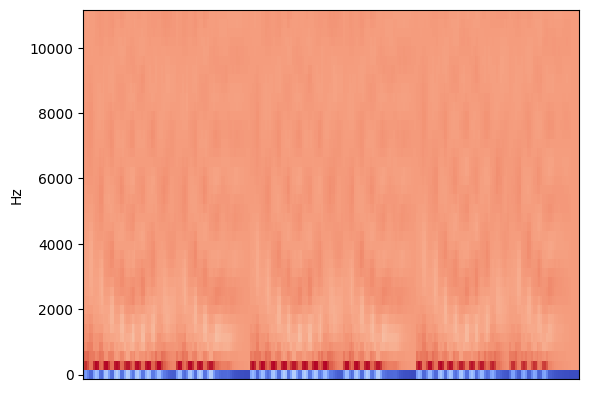

In [71]:
librosa.display.specshow(mfccs, y_axis='linear')

In [72]:
dict={'Mfcc':a}

In [73]:
extracted_features_single= pd.DataFrame(dict)
extracted_features_single.head()

,Mfcc
0,"[[-484.34784, -461.7183, -511.9643, -563.55695..."


In [74]:
single_fea1=np.array(extracted_features_single['Mfcc'].tolist())
single_fea1.shape

(1, 40, 256)

In [75]:
import numpy as np
dataset = []
cla=[]
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'E:\\Music genre project\\Data\\genres_original\\{genre}'):
        songname = f'E:\\Music genre project\\Data\\genres_original\\{genre}\\{filename}'
        
        audio, sr = librosa.load(songname,res_type='kaiser_test')
        mfcc_fea = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T,axis=0)
        fea_class=genre
        dataset.append(mfcc_fea)
        cla.append(fea_class)

In [76]:
d = {'Features':dataset,'class':cla}

In [77]:
import pandas as pd
extracted_features_df=pd.DataFrame(d)
extracted_features_df.head()

,Features,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [78]:
len(dataset)

999

In [79]:
### Split the dataset into independent and dependent dataset
X=np.array(dataset)
#(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [80]:
X.shape

(999, 40)

In [81]:
y

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [82]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [83]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [84]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [85]:
X_train

array([[ 2.6653410e+01,  7.9789711e+01, -5.2055866e+01, ...,
        -1.4430333e+00, -1.2734197e+00, -5.9081397e+00],
       [-1.4495711e+02,  1.1846496e+02,  2.0525068e+01, ...,
         1.8998559e+00, -1.8821739e+00, -1.8517891e+00],
       [-6.6108925e+01,  9.7883812e+01, -1.8831675e+01, ...,
        -1.2424636e+00, -6.3691193e-01, -1.3383397e+00],
       ...,
       [-7.7426697e+01,  1.3087869e+02, -2.3275221e+01, ...,
        -4.2062173e+00, -3.5183537e+00,  2.6050334e+00],
       [-1.9040649e+02,  1.2951292e+02, -7.8296256e+00, ...,
        -2.2419319e+00, -3.9879441e+00, -1.9877435e+00],
       [-4.6609550e+01,  8.6802010e+01, -3.4776669e+01, ...,
         1.4675996e-01,  9.2151558e-01, -8.7239450e-01]], dtype=float32)

In [86]:
X_train.shape

(799, 40)

In [87]:
X_test.shape

(200, 40)

In [88]:
y_train.shape

(799, 10)

In [89]:
y_test.shape

(200, 10)

In [90]:
X_train=np.reshape(X_train,(X_train.shape[0],10,4,1))
X_test=np.reshape(X_test,(X_test.shape[0],10,4,1))

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [92]:
import tensorflow.keras.layers as layers
import IPython.display as ipd

In [93]:
INPUTSHAPE = (10,4,1)

In [94]:
model = Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.GlobalAveragePooling2D(),
                          layers.Flatten(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(10 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 8, 2, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,498 (279.29 KB)

 Trainable params: 71,498 (279.29 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
import tensorflow as tf

In [96]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
#checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                             # verbose=1, save_best_only=True)
history = model.fit(X_train,y_train ,validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.2430 - loss: 2.7342 - val_acc: 0.3400 - val_loss: 1.7176
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4632 - loss: 1.5852 - val_acc: 0.4250 - val_loss: 1.5622
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5392 - loss: 1.2914 - val_acc: 0.5100 - val_loss: 1.4625
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5577 - loss: 1.2137 - val_acc: 0.5500 - val_loss: 1.2592
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6587 - loss: 1.0327 - val_acc: 0.5700 - val_loss: 1.2224
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7329 - loss: 0.8112 - val_acc: 0.5500 - val_loss: 1.2062
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7281 - loss: 0.8126 - val_acc: 0.5650 - val_loss: 1.1565
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7290 - loss: 0.7796 - val_acc: 0.5700 - val_loss: 1.2266
Epoch 9/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

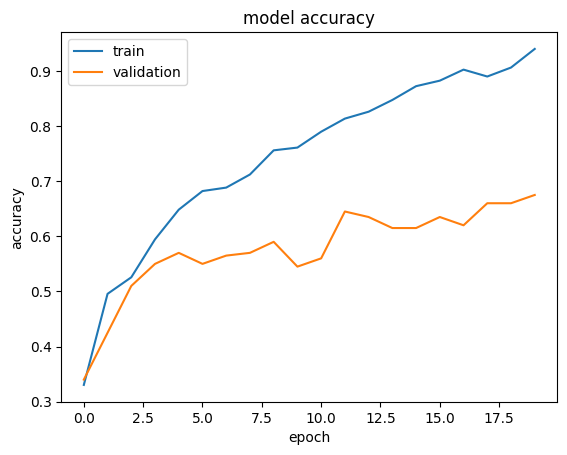

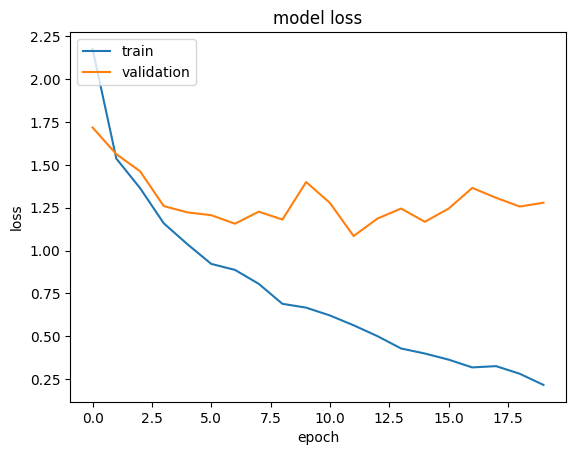

In [102]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [104]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.675000011920929


In [99]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [100]:
y_pred=model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [105]:
round_off=np.round(y_pred)

Confusion Matrix
[[12  0  0  0  0  0  0  0  0  2]
 [ 0 10  0  0  1  0  0  0  0  0]
 [ 1  1  9  2  0  5  0  0  5  3]
 [ 4  0  0  6  3  0  0  1  2  8]
 [ 6  0  0  3 12  1  1  0  4  0]
 [ 0  0  0  0  0 15  0  0  1  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 3  0  0  1  0  0  0 17  1  1]
 [ 2  0  0  0  1  0  0  1 16  1]
 [ 1  0  1  0  0  0  2  0  0 16]]


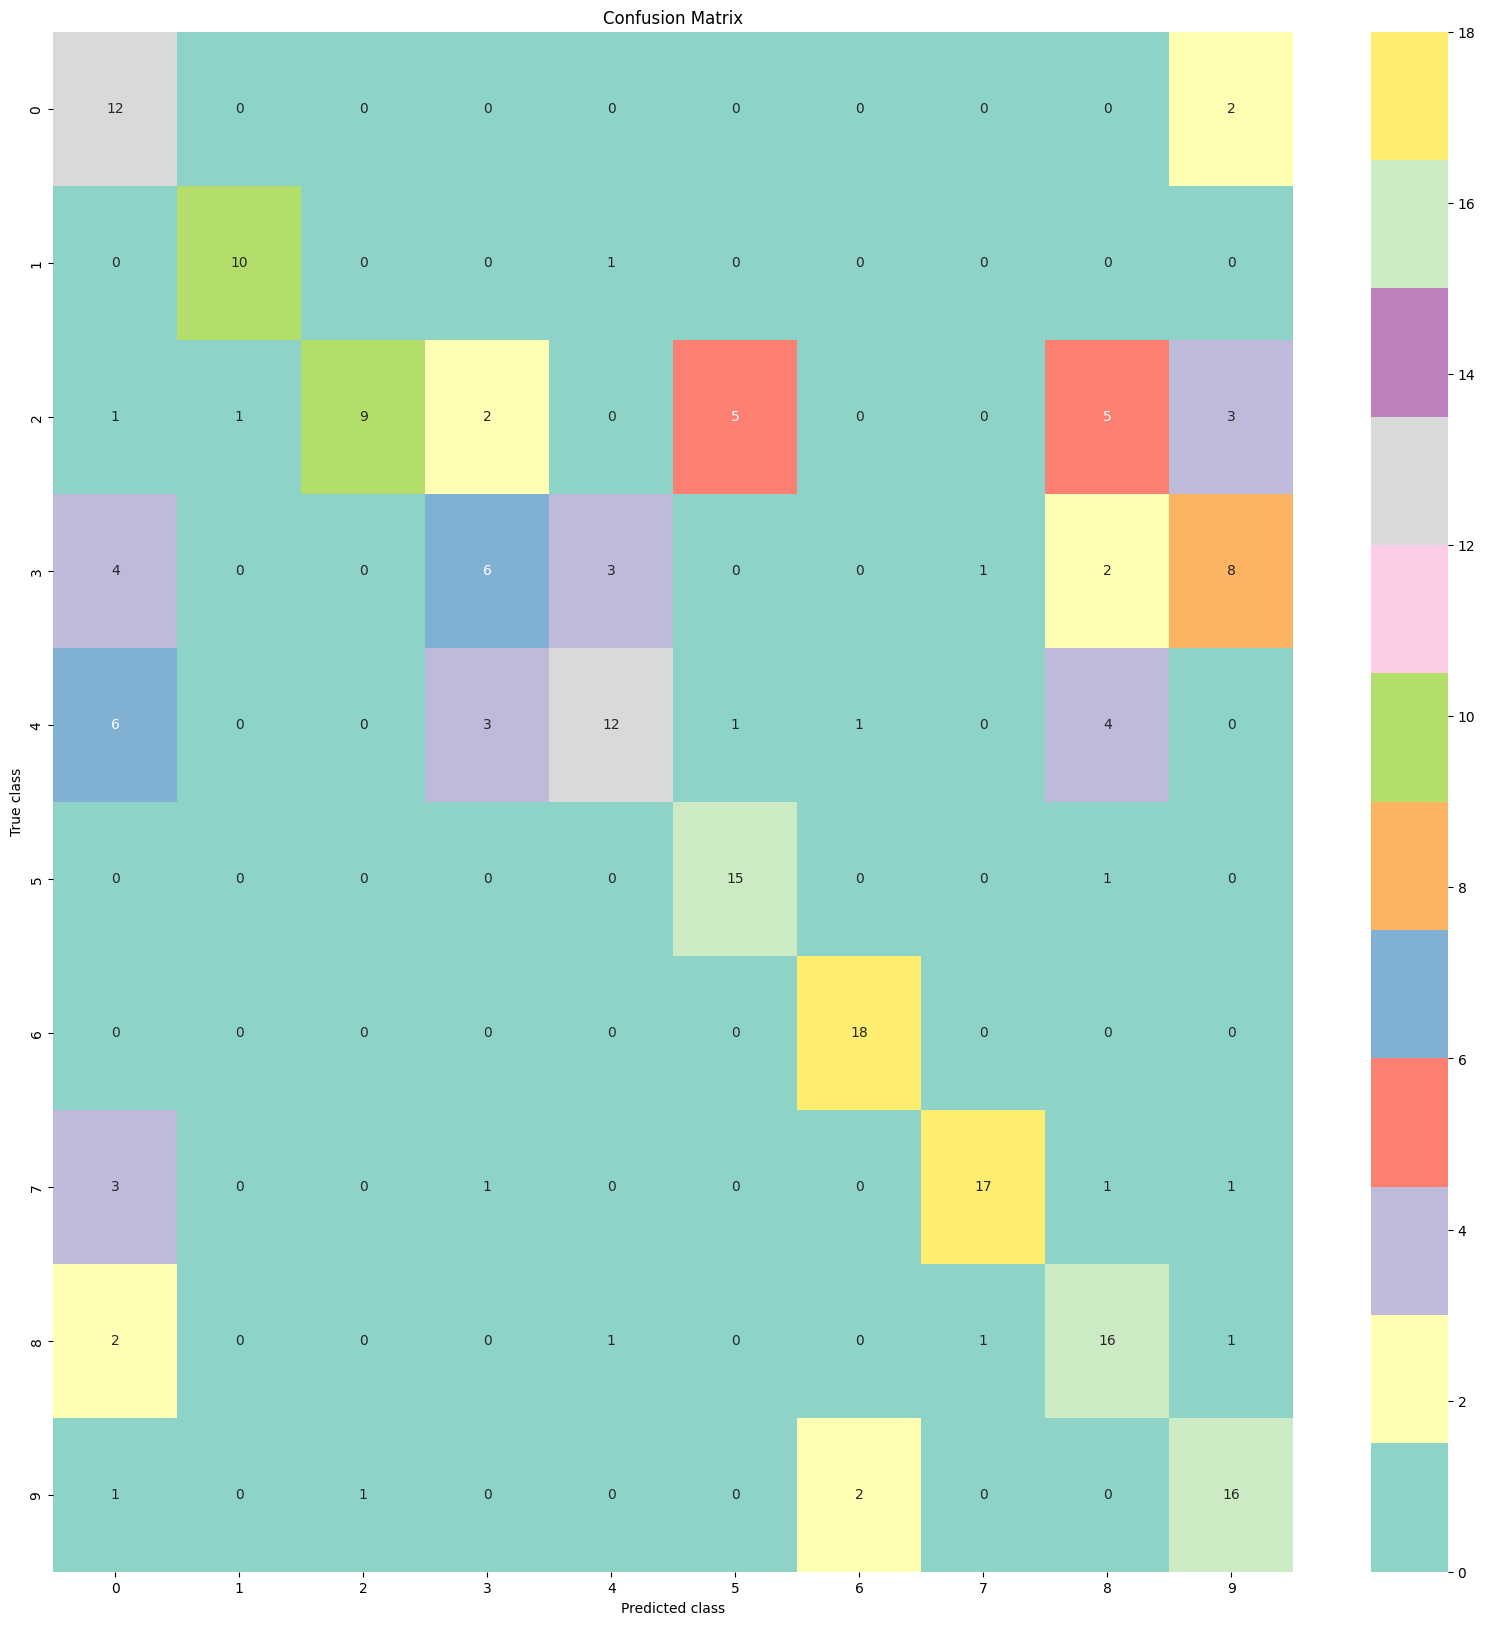

In [107]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [ ]:
import librosa
import numpy as np

# Your dictionary mapping genre names to class labels
mydict = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

# Path to the audio file
audio_file_path = "E:\\Music genre project\\Data\\genres_original\\hiphop\\hiphop.00029.wav"

# Load audio data using librosa
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

# Extract MFCCs from the audio file
mfccs = np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T, axis=0)

# Prepare the input data for the model
x = []
x.append(mfccs)
x = np.array(x)

# Assuming your model expects the shape (batch_size, 10, 4, 1), reshape accordingly
x = np.reshape(x, (x.shape[0], 10, 4, 1))

# Get model prediction
y_pre = model.predict(x)

# Get the index of the maximum value (i.e., predicted genre)
predicted_class = np.argmax(y_pre, axis=1)

# Convert class index to genre name
for genre, classs in mydict.items():
    if classs == predicted_class[0]:  # Check if predicted class matches
        print(genre)  # Print the predicted genre


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
hiphop
